### Nesse notebook, iremos responder algumas perguntas propostas no case. Primeiramente, faremos a importação de algumas bibliotecas básicas que são frequentemente utilizadas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

### Além disso, pelo fato da tabela proposta se encontrar em um documento Word, instalaremos a biblioteca docx e construíremos uma lógica simples para ler a tabela diretamente do documento no Python.

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 1.1 MB/s eta 0:00:00


In [ ]:
import docx

ID_CLIENTE = []
ID_VENDA = []
DT_VENDA = []
VLR_VENDA = []
DT_VCT = []
DT_PGTO =[]
DT_PROCESSAMENTO = []

documento = docx.Document('/content/Teste_Ciencia_Dados.docx')

In [ ]:
lista_colunas =  [ID_CLIENTE, ID_VENDA, DT_VENDA, VLR_VENDA, DT_VCT,DT_PGTO,DT_PROCESSAMENTO]
z = 0
for coluna in lista_colunas:
  x=1
  while x <= 12:
    coluna.append(documento.tables[0].cell(x,z).text)
    x += 1
  z +=1

In [ ]:
nome_colunas = ['ID_CLIENTE', 'ID_VENDA', 'DT_VENDA', 'VLR_VENDA', 'DT_VCT','DT_PGTO','DT_PROCESSAMENTO']

In [ ]:
df_inicial = pd.DataFrame(dict(zip(nome_colunas, lista_colunas)))

In [ ]:
df_inicial

,ID_CLIENTE,ID_VENDA,DT_VENDA,VLR_VENDA,DT_VCT,DT_PGTO,DT_PROCESSAMENTO
0,A,1,15/01/2022,R$ 150.000,15/09/2022,16/09/2022,17/01/2023 08:25:52
1,B,2,29/01/2022,R$ 220.000,01/09/2022,25/08/2022,17/01/2023 08:25:52
2,C,3,28/02/2022,R$ 145.000,01/09/2022,30/11/2022,17/01/2023 08:25:52
3,D,4,09/03/2022,R$ 330.000,10/10/2022,-,17/01/2023 08:25:52
4,E,5,10/03/2022,R$ 95.000,30/09/2022,15/10/2022,17/01/2023 08:25:52
5,F,6,15/04/2022,R$ 400.000,15/10/2022,06/02/2023,17/01/2023 08:25:52
6,G,7,30/07/2022,R$ 370.000,15/03/2023,-,17/01/2023 08:25:52
7,G,7,30/07/2022,R$ 370.000,15/03/2023,-,31/07/2022 00:00:00
8,H,8,05/08/2022,R$ 295.000,15/03/2023,28/02/2023,17/01/2023 08:25:52
9,A,9,11/11/2022,R$ 186.000,21/05/2023,-,12/11/2022 00:00:00


### Agora, com a tabela inicial construída, serão necessários tratamentos nos tipos de dados. Primeiro, transformaremos as colunas de data para o formato datetime.

In [ ]:
df_inicial['HORA_PROCESSAMENTO'] = df_inicial['DT_PROCESSAMENTO'].str.split(' ').str[1]
df_inicial['DT_PROCESSAMENTO'] = df_inicial['DT_PROCESSAMENTO'].str.split(' ').str[0]

In [ ]:
df_inicial['DT_PGTO'] = df_inicial["DT_PGTO"].replace("-", pd.NA)

In [ ]:
df_inicial['DT_VENDA'] = pd.to_datetime(df_inicial['DT_VENDA'])
df_inicial['DT_VCT'] = pd.to_datetime(df_inicial['DT_VCT'])
df_inicial['DT_PGTO'] = pd.to_datetime(df_inicial['DT_PGTO'], errors='coerce')
df_inicial['DT_PROCESSAMENTO'] = pd.to_datetime(df_inicial['DT_PROCESSAMENTO'])

In [ ]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_CLIENTE          12 non-null     object        
 1   ID_VENDA            12 non-null     object        
 2   DT_VENDA            12 non-null     datetime64[ns]
 3   VLR_VENDA           12 non-null     object        
 4   DT_VCT              12 non-null     datetime64[ns]
 5   DT_PGTO             7 non-null      datetime64[ns]
 6   DT_PROCESSAMENTO    12 non-null     datetime64[ns]
 7   HORA_PROCESSAMENTO  12 non-null     object        
dtypes: datetime64[ns](4), object(4)
memory usage: 896.0+ bytes


### Repare que alguns IDs de venda estão duplicados na base. É possível perceber que eles foram reprocessados em uma data posterior à sua venda, porém, o registro anterior não foi excluído. No dia a dia, poderíamos consultar a equipe responsável para entender o que houve. Uma questão pertinente: A ideia era registrar uma venda de dois artefatos do mesmo preço? Nesse caso, instruíriamos a inputar os dados de outra maneira, pois o Id_Venda deve ser uma chave primária daquela venda e não pode ser duplicado.
### Neste caso, como estamos fazendo apenas uma análise para estudo de uma empresa fictícia, consideraremos a alternativa do erro de processamento e excluíremos da nossa base de dados.

In [ ]:
df_inicial = df_inicial.drop_duplicates(subset='ID_VENDA', keep='first')

### Agora, transformaremos a coluna VLR_VENDA em float.

In [ ]:
df_inicial['VLR_VENDA'] = df_inicial['VLR_VENDA'].str.split(' ').str[1].astype(float)

### Agora, com os valores devidamente tratados, vamos visualizar um gráfico com as vendas ao longo do tempo.

In [ ]:
df_vendas_dia = df_inicial.groupby('DT_VENDA')['VLR_VENDA'].sum().reset_index()

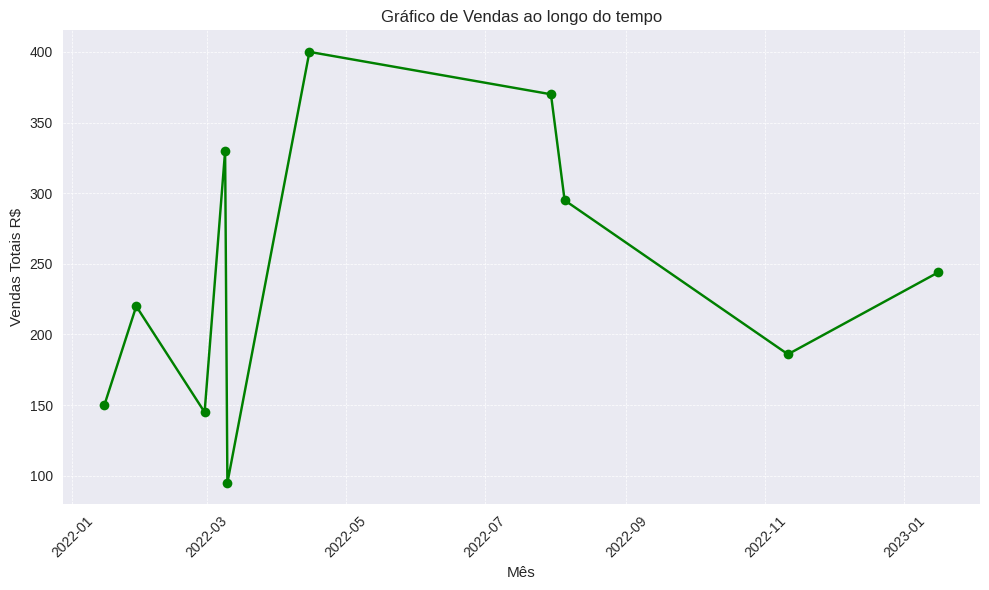

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_vendas_dia['DT_VENDA'], df_vendas_dia['VLR_VENDA'], color='green', marker='o', linestyle='-')

ax.set_title('Gráfico de Vendas ao longo do tempo')
ax.set_xlabel('Mês')
ax.set_ylabel('Vendas Totais R$')

plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### Como temos poucos dados e não sabemos o segmento de vendas da empresa, não é possível tirar conclusões sobre o comportamento das vendas. Este gráfico poderia indicar sazonalidade das vendas em uma base de dados maior. Por exemplo, talvez uma empresa brasileira que confeccione blusas de inverno tenha os maiores números para suas vendas entre o fim de março e início de setembro, pois em março se aproximam os meses mais frios do ano no Brasil e o período se encerra por volta de setembro.

### Agora, vamos responder a primeira pergunta proposta: Qual é a quantidade de clientes da empresa ZgX que realizaram compras em 2022?

In [ ]:
clientes_22 = df_inicial.query('DT_VENDA <= "2022-12-31"')['ID_CLIENTE'].nunique()
print(f'O número de clientes da empresa ZgX que realizaram compras em 2022 é: {clientes_22}')

O número de clientes da empresa ZgX que realizaram compras em 2022 é: 8


### A segunda pergunta proposta é: Qual é a quantidade de vendas realizadas pela empresa ZgX nos anos de 2022 e 2023?

In [ ]:
vendas_22 = df_inicial.query("DT_VENDA <= '31-12-2022'")['ID_VENDA'].nunique()
vendas_23 = df_inicial.query("DT_VENDA > '31-12-2022'")['ID_VENDA'].nunique()
vendas_totais = df_inicial['ID_VENDA'].nunique()
print(f'O número de vendas realizadas pela empresa ZgX nos anos de 2022 é: {vendas_22} e o número de vendas no ano de 2023 é: {vendas_23}. O número total de vendas é: {vendas_totais}')

O número de vendas realizadas pela empresa ZgX nos anos de 2022 é: 9 e o número de vendas no ano de 2023 é: 1. O número total de vendas é: 10


### Neste caso, como excluímos anteriormente os Id_Vendas duplicados, o número de vendas totais coincide com o número de Ids

### A terceira pergunta é: Qual é o valor médio (em R$) das vendas realizadas em 2022? E em 2023?

In [ ]:
vendas_22_totais = df_inicial.query("DT_VENDA <= '31-12-2022'")['VLR_VENDA'].sum()
vendas_22_media = vendas_22_totais / 9
vendas_23 = df_inicial.query("DT_VENDA > '31-12-2022'")['VLR_VENDA'].sum()

In [ ]:
print(f'O valor total das vendas realizadas em 2022 é R${vendas_22_totais}')
print(f'O valor médio das vendas realizadas em 2022 é: R${vendas_22_media:.2f}')
print(f'O valor total das vendas realizadas em 2023 é: R${vendas_23}')

O valor total das vendas realizadas em 2022 é R$2191.0
O valor médio das vendas realizadas em 2022 é: R$243.44
O valor total das vendas realizadas em 2023 é: R$244.0


### Para calcular o valor médio, utilizamos a resposta anterior em que verificamos haver 9 vendas para o ano de 2022. No ano de 2023, apenas uma venda foi realizada, portanto, seu valor médio coincide com o valor total.

### A quarta pergunta é: Qual é o prazo médio de pagamento (em dias) das vendas realizadas em 2022? E em 2023?

In [ ]:
df_inicial['DIAS_PAGAMENTO'] = df_inicial['DT_PGTO'] - df_inicial['DT_VENDA']
df_inicial['DIAS_PAGAMENTO'] = df_inicial['DIAS_PAGAMENTO'].dt.days

In [ ]:
prazo_pgto_medio = df_inicial.query("DT_VENDA <= '31-12-2022'")['DIAS_PAGAMENTO'].mean()
prazo_pgto_23 = df_inicial.query("DT_VENDA > '31-12-2022'")['DIAS_PAGAMENTO'].sum()

In [ ]:
print(f'O prazo de pagamento médio em 2022 é de {prazo_pgto_medio.round():.0f} dias')
print(f'O prazo de pagamento médio em 2023 é de {prazo_pgto_23:.0f} dias')

O prazo de pagamento médio em 2022 é de 242 dias
O prazo de pagamento médio em 2023 é de 205 dias


### O cálculo do prazo médio de pagamento em dias resultou em 241.6 dias. Como não há interpretabilidade de um número decimal para dias, arrendondamos para cima, resultando em 242 dias. Como o ano de 2023 só possui uma venda, o valor médio coincide com o intervalo entre a compra e o pagamento. Os dias sem o pagamento registrado foram desconsiderados na média. Desta vez, utilizamos a função Mean para calcular a média. Se fizessemos o cálculo completo, deveríamos dividir por 6, sendo este o resultado da subtração de número de vendas em 2022 por linhas sem registro de pagamento. A média calculada considerando as linhas sem pagamento pode ser útil para entender o impacto causado pela inadimplência, porém, para entendimento do comportamento de clientes pagantes, é mais interessante desconsiderar os inadimplentes. Tudo dependerá do objetivo da análise que está sendo feita.

### A próxima pergunta é: Quantas vendas foram pagas em dia ou antecipadamente?

In [ ]:
vendas_no_dia = df_inicial.query("DT_PGTO == DT_VCT")['ID_VENDA'].nunique()
vendas_antecipadas = df_inicial.query("DT_PGTO <= DT_VCT")['ID_VENDA'].nunique()

In [ ]:
print(f'O número de vendas pagas no dia do vencimento é: {vendas_no_dia}')
print(f'O número de vendas pagas antecipadamente é: {vendas_antecipadas}')

O número de vendas pagas no dia do vencimento é: 0
O número de vendas pagas antecipadamente é: 2


### A próxima pergunta é: Quantas vendas ficaram sem pagamento por mais de 90 dias?

### Para todas as questões envolvendo prazos de pagamento a seguir, consideraremos que onde não há data de pagamento registrado, o pagamento segue atrasado.

### Como já temos dados de pagamento em Agosto de 2023 e todos os dados sem registro de pagamento são de 2022, consideraremos que todos estes estão em atraso há mais de 90 dias. Para um processo estruturado, o código levaria em conta na query, além de buscar os pagamentos nulos, uma condição que trouxesse apenas vendas realizadas, no mínimo, 90 dias antes da data da consulta.

In [ ]:
qtd_pgto_90 = df_inicial.query("DIAS_PAGAMENTO > 90 or DIAS_PAGAMENTO.isnull()")['ID_VENDA'].nunique()

In [ ]:
print(f'O número de vendas que ficaram sem pagamento por mais de 90 dias é: {qtd_pgto_90}')

O número de vendas que ficaram sem pagamento por mais de 90 dias é: 10


### A próxima pergunta é: Quantos clientes atrasaram o pagamento de suas compras por mais de 90 dias?

In [ ]:
df_inicial['DIAS_ATRASO'] = df_inicial['DT_PGTO'] - df_inicial['DT_VCT']
df_inicial['DIAS_ATRASO'] = df_inicial['DIAS_ATRASO'].dt.days

In [ ]:
n_clientes_atrasados = df_inicial.query("DIAS_ATRASO > 90 or DIAS_PAGAMENTO.isnull()")['ID_CLIENTE'].nunique()
clientes_atrasados90 = df_inicial.query("DIAS_ATRASO == 90")['ID_CLIENTE'].nunique()

In [ ]:
print(f'O número de clientes que atrasou o pagamento por mais de 90 dias é {n_clientes_atrasados} e {clientes_atrasados90} cliente atrasou o pagamento por exatamente 90 dias')

O número de clientes que atrasou o pagamento por mais de 90 dias é 4 e 1 cliente atrasou o pagamento por exatamente 90 dias


### A próxima pergunta é Quanto a empresa ZgX tinha a receber (em R$) em 31/10/2022?

In [ ]:
valor_a_receber = df_inicial.query("DT_VENDA <= '2022/10/31' and DT_PGTO > '2022/10/31' or DT_VENDA <= '2022/10/31' and DIAS_PAGAMENTO.isnull()")['VLR_VENDA'].sum()

In [ ]:
print(f'A empresa tinha R${valor_a_receber:.2f} a receber em 31/10/2022')

A empresa tinha R$1540.00 a receber em 31/10/2022


### Por fim, a última pergunta proposta é: Quanto a empresa ZgX tinha a receber (em R$) em 31/08/2022?

In [ ]:
valor_a_receber_agosto = df_inicial.query("DT_VENDA <= '2022/08/31' and DT_PGTO > '2022/08/31' or DT_VENDA <= '2022/08/31' and DIAS_PAGAMENTO.isnull()")['VLR_VENDA'].sum()

In [ ]:
print(f'A empresa tinha R${valor_a_receber_agosto:.2f} a receber em 31/10/2022')

A empresa tinha R$1785.00 a receber em 31/10/2022


### Vamos visualizar a diferença entre os dois meses em gráfico.

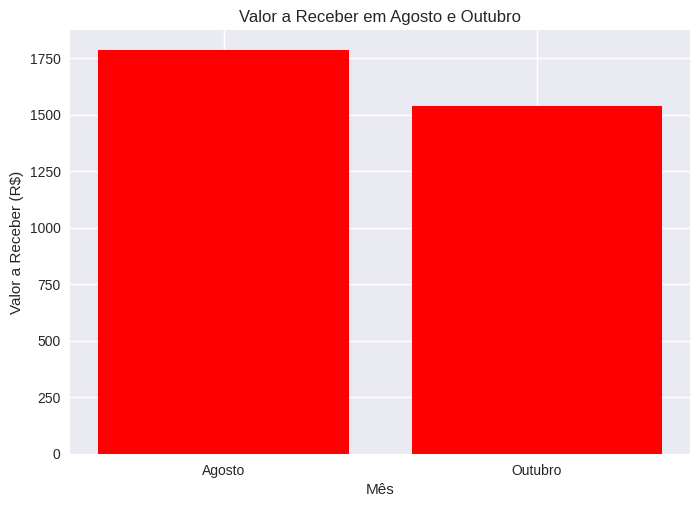

In [ ]:
dados_grafico_barra = {'Mês': ['Agosto', 'Outubro'], 'Valor a Receber': [valor_a_receber_agosto, valor_a_receber]}
df_grafico = pd.DataFrame(dados_grafico_barra)

plt.bar(df_grafico['Mês'], df_grafico['Valor a Receber'], color='red')
plt.title('Valor a Receber em Agosto e Outubro')
plt.xlabel('Mês')
plt.ylabel('Valor a Receber (R$)')
plt.show()


### Em conclusão, esta atividade necessitou o uso de técnicas de exploração e coleta de dados de documentos, no caso, um documento de texto no Word, utilização de técnicas de tratamento de dados e montagem de Queries para responder às perguntas de negócio. Com mais dados, seria possível construir análises mais robustas, podendo estas resultarem em dashboards, análises preditivas ou segmentação de clientes. A análise da série temporal de vendas poderia nos fornecer insights relativos à sazonalidade e tendência das vendas ao longo do tempo, além da possibilidade de utilização de técnicas como ARIMA, SARIMA, LSTM (Dentre outros modelos de redes), para prever vendas futuras. Técnicas de regressão também poderiam ser aplicadas à previsão de preços de acordo com outras variáveis que poderiam ser coletadas. Além disso, técnicas de classificação poderiam ser aplicadas para verificar, de acordo com histórico anterior, o risco de uma venda ter seu pagamento atrasado. Neste sentido, Regressão Logística, Random Forest, algoritmos ensemble (XGBoost, LGBM, o próprio Random Forest e etc), dentre outros, poderiam ser aplicados para esta análise. Também é possível realizar a segmentação dos clientes, estudando assim, por exemplo, suas preferências de consumo com relação à produto, período do ano, dentre outras informações úteis. Sendo assim, o poder de análise frente a um banco de dados robusto é grande e fornece insights valiosos à empresa que investe no setor de dados.